# Assignment 5
### Linear Regression

### Dataset

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics who believe that underused statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this assignment we'll be looking at data from all 30 Major League Baseball teams from 2011 and examine the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships, both graphically and numerically, in order to determine which variable, if any, helps us best predict the runs that a team scored in a season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss

sns.set_style("whitegrid")

In [2]:
baseball = pd.read_csv('BaseballStats.csv')
baseball.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


Here are the descriptions of the variables in this dataset:

*  team: Team name
*  runs: Number of runs

*Traditional variables for predicting the number of runs:*
*  at_bats: Number of at bats (the number of times a batter had a turn batting against a pitcher)
*  hits: Number of hits (when the batter safely reaches or passes first base after hitting the ball into fair territory)
*  homerun: Number of home runs.
*  bat_avg: Batting average (the number of hits divided by at bats)
*  strikeouts: Number of strikeouts (when a batter racks up three strikes during a time at bat).
*  stolen_bases: Number of stolen bases (when a runner advances to a base to which he is not entitled)
*  wins: Number of wins.

*New variables for predicting the number of runs:*
*  new_onbase: On base percentage, measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.
*  new_slug: Slugging percentage, measure of the power of a hitter calculated as the total bases divided by at bats.
*  new_obs: On base plus slugging, calculated as the sum of these two variables



We will start by looking at the association between the number of `runs` and the number of `at_bats`.

### Exercise 1
Looking at the data is an important first step in any analysis. 

1. Choose an appropriate plot to visualize the association between `runs` and `at_bats`  (with `runs` as $y$-value). Label the plot appropriately.
2. Describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations. Would you be comfortable fitting a linear model to these data? <div style="text-align: right"> **5 points** </div>

Question 1
The asociation between runs and at_bats can be shown as x(horizontal axis) is at_bats, y(Vertical axis) is runs


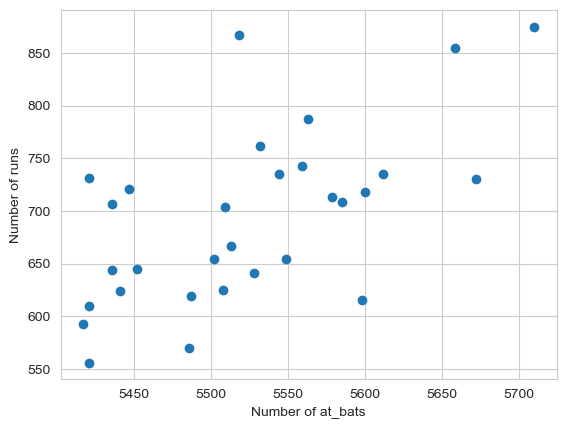

Question 2
Form:Looks like a diagonal spread of disparate points, which may not look straight, but it's not a perfectly straight line.
Direction:It may be positive, as it appears to be rightward.
Strength:I don't think the points on the scatterplot are very strong. But they are not incredibly scattered either.
unusual observations:If there is dot in a totally different place from the rest of the points, these weird data would be an outlier. There are 2 or 3 dots that are far apart.


In [17]:
# your code/answer here
def print_question(question_number, sep_line_width = 60):
    print(f"Question {question_number}")
    print(sep_line_width * "=")

print_question(1)

print(f"The asociation between runs and at_bats can be shown as x(horizontal axis) is at_bats, y(Vertical axis) is runs")

plt.scatter(baseball["at_bats"], baseball["runs"])
plt.xlabel("Number of at_bats") 
plt.ylabel("Number of runs")  
plt.show()


print_question(2)

print(f"Form:Looks like a diagonal spread of disparate points, which may not look straight, but it's not a perfectly straight line.")
print(f"Direction:It may be positive, as it appears to be rightward.")
print(f"Strength:I don't think the points on the scatterplot are very strong. But they are not incredibly scattered either.")
print(f"unusual observations:If there is dot in a totally different place from the rest of the points, these weird data would be an outlier. There are 2 or 3 dots that are far apart.")

**Exercise 2** 

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [4]:
baseball['runs'].corr(baseball['at_bats'])

0.6106270467206687

In order to determine the best fit line we can use `statsmodels`, a useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [19]:
# the following means: explain variable 'runs' as a function of (some transformation of) variable 'at_bats'
formula_string = "runs ~ at_bats"

# remember OLS = "ordinary least squares" - by far the most commonly used form of linear regression
model = sm.formula.ols(formula = formula_string, data = baseball)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Thu, 15 May 2025   Prob (F-statistic):           0.000339
Time:                        04:11:44   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

1. Based on the output above, write down the equation of the best-fit line.
2. Write down the $R^{2}$ of the model. <div style="text-align: right"> **2 points** </div>

In [21]:
# your code/answer here

print_question(1)
print(f"The table shows Intercept  -2789.2429, this is a point where the straight line intersects the y-axis.")
print(f"And the slope part is 0.6305 for at_bats, like how much runs goes up when at_bats increases")
print(f"Equation for Simple linear regression is y = mx + b")
print(f"The equation of the best-fit line is: runs = 0.6305 * at_bats + (-2789.2429)")

print_question(2)
print(f"R^2 of the model is R-squared: 0.373 according to the above table")

Question 1
The table shows Intercept  -2789.2429, this is a point where the straight line intersects the y-axis.
And the slope part is 0.6305 for at_bats, like how much runs goes up when at_bats increases
Equation for Simple linear regression is y = mx + b
The equation of the best-fit line is: runs = 0.6305 * at_bats + (-2789.2429)
Question 2
R^2 of the model is R-squared: 0.373 according to the above table


### Exercise 3

Plot the association between the two variables again, but this time with the linear model added so there is a visualisation of the model with the data.

1. First, plot the association between the variables, as you did above in Question 1. 
2. Second, use the formula you specified above to compute the predicted number of `runs` ($\hat{y}$) for each value of `at_bats` (${x}$). You can access the intercept and slope of the fitted model by indexing `model_fitted.params`. 
3. Finally, use a lineplot (`sns.lineplot`) to visualize the regression line on top of the first plot. <div style="text-align: right"> **3 points** </div>

Question 1


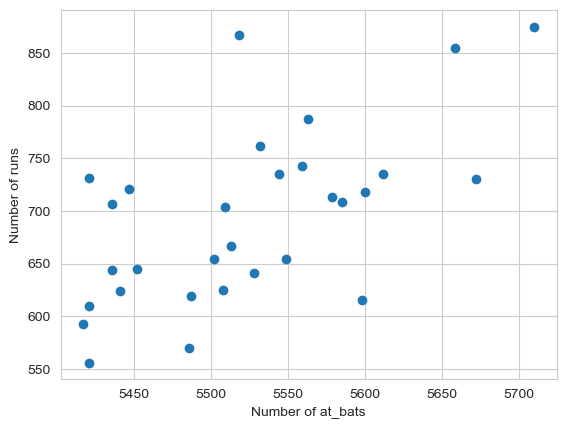


Question 2

Question 3



In [22]:
# your code/answer here
print_question(1)
plt.scatter(baseball["at_bats"], baseball["runs"])
plt.xlabel("Number of at_bats") 
plt.ylabel("Number of runs")  
plt.show()

print(f"")
print_question(2)
print(f"")
print_question(3)
print(f"")

### Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

Linearity: You already checked if the relationship between `runs` and `at_bats` is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. `at_bats`.

### Exercies 4 

1. To check linearity, plot the residuals against `at_bats`. Remember that the residual scores are defined as $e_{i} = y_{i} - \hat{y}_{i}$ where $e_{i}$ is the residual value, $y_{i}$ is the actual $y$-value, and $\hat{y}_{i}$ is the predicted $y$-value (Hint: use `sns.residplot` for the plotting part).
2. Does the data show a linear trend, or not? Justify your answer. <div style="text-align: right"> **3 points** </div>

In [8]:
# your code/answer here

### Exercise 5

Now we will check whether the residuals are *normally distributed*.
1. Plot the residuals in a histogram.
2. Plot the residuals in a QQ-plot (use `probplot` from `scipy.stats` as `probplot(residual_values, plot=plt)`).
3. Are the residuals normally distributed, or not? Explain your answer.<div style="text-align: right"> **4 points** </div>

In [9]:
# your code/answer here

In [10]:
# your code/answer here

### Exercise 6

Constant variability is the last condition that we will check. Look back at the residual plot of Exercise 4 and determine (qualitatively, by "eye-balling" the plot) if the variability is rougly constant along the whole range of the x-axis. Explain your answer. <div style="text-align: right"> **2 points** </div>

In [11]:
# your code/answer here

### Exercise 7

You now have succesfully created a linear model of the data and checked it's validity. There are many more regression techniques for different types of data, but for the next question we will stick with the linear ones.
 
1. Create a linear model for one of the other traditional variables vs runs (hits, homeruns, bat_avg, strikeouts, stolen_bases, or wins). Choose one you think will be a good predictor. Write down the linear formula and the $R^{2}$. Don't forget to create a plot to visualize the association between the two variables.

2. Create a linear model for one of the 3 new variables (new_onbase, new_slug, new_obs) and write down the linear formula and the $R^{2}$ and create a plot to visualize the association between the two variables.
 
3. From the two variables you have chosen above, which variable predicts the `runs` variable the best? Why?

4. Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs. Do these model diagnostics indicate that this linear model is reliable (i.e., check the three assumptions)?<div style="text-align: right"> **10 points** </div>

In [12]:
# your code/answer here

In [13]:
# your code/answer here

In [14]:
# your code/answer here

In [15]:
# your code/answer here

**Total number of points**: 29